In [58]:

import numpy as np


def load_poses(pose_file):

    # Read and parse the poses
    poses = []
    try:
        with open(pose_file, 'r') as f:
            lines = f.readlines()

            for line in lines:
                T_w_cam0 = np.fromstring(line, dtype=float, sep=' ')
                T_w_cam0 = T_w_cam0.reshape(3, 4)
                T_w_cam0 = np.vstack((T_w_cam0, [0, 0, 0, 1]))
                poses.append(T_w_cam0)

    except FileNotFoundError:
        print('Ground truth poses are not available for sequence.')
        
    return poses

pose_file = "/home/bwshen/data_set/kitti/data_odometry_poses/dataset/poses/10.txt"
poses = load_poses(pose_file) 
for i in range(10):
    print(poses[i])

Ground truth poses are not available for sequence.


IndexError: list index out of range

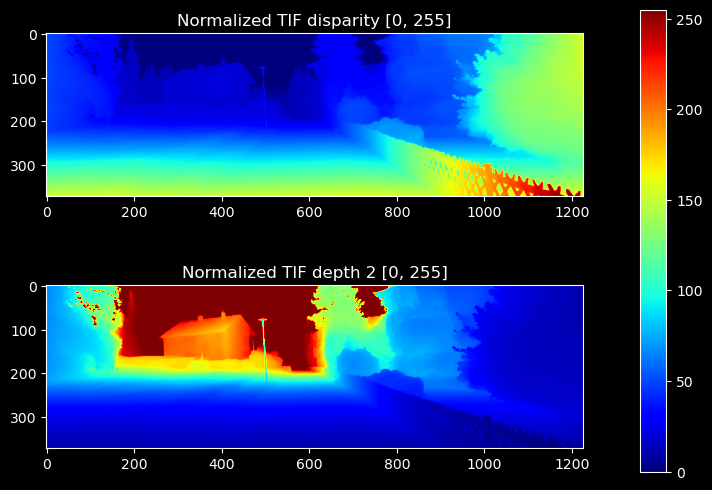

In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

# 读取 .tif 文件
file_path = '/home/weison/Desktop/depth_calculate/data/0000000071_pred.tif'
tif_image = tiff.imread(file_path)
tif_image2 = np.copy(tif_image)

tif_copy = np.copy(tif_image)
# tif_copy[tif_copy > 658.98] = 658.98
downlimit = 40.0
tif_copy[tif_copy < downlimit ] = downlimit 
# tif_image_inverse = 1.0/ (tif_image)
tif_image_inverse = 1.0 / (tif_copy)

# tif_image_inverse[tif_image_inverse > 658.98] = 658.98
# tif_image_inverse[tif_image_inverse < 0.0015] = 658.98
# 归一化到 [0, 255] 范围
# 获取像素最小值和最大值
min_val = np.min(tif_image)
min_val_inverse = np.min(tif_image_inverse)
max_val = np.max(tif_image)
max_val_inverse = np.max(tif_image_inverse)


# 归一化公式: (x - min) / (max - min) * 255
normalized_image = (tif_image - min_val) / (max_val - min_val) * 255
normalized_image_inverse = (tif_image_inverse -  min_val_inverse) / (max_val_inverse - min_val_inverse) * 255
normalized_image = normalized_image.astype(np.uint16)  # 转换为 8-bit 格式
normalized_image_inverse = normalized_image_inverse.astype(np.uint16)  # 转换为 8-bit 格式


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 创建一个 2x1 的子图布局，并在右侧添加一个色彩条区域
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 1])

# 在第一个子图中显示第一张图像
ax1 = plt.subplot(gs[0, 0])
im1 = ax1.imshow(normalized_image, cmap='jet')
ax1.set_title('Normalized TIF disparity [0, 255]')

# 在第二个子图中显示第二张图像
ax2 = plt.subplot(gs[1, 0])
im2 = ax2.imshow(normalized_image_inverse, cmap='jet')
ax2.set_title('Normalized TIF depth 2 [0, 255]')

# 在右侧添加共享的色彩条
cbar_ax = plt.subplot(gs[:, 1])
fig.colorbar(im2, cax=cbar_ax)

# 显示图形
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 创建一个 1x2 的子图布局
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个子图中显示第一张图像
im1 = axes[0].imshow(normalized_image, cmap='jet')
axes[0].set_title('Normalized TIF Image 1 [0, 255]')
fig.colorbar(im1, ax=axes[0])  # 显示色彩条

# 在第二个子图中显示第二张图像
im2 = axes[1].imshow(normalized_image_inverse, cmap='jet')
axes[1].set_title('Normalized TIF Image 2 [0, 255]')
fig.colorbar(im2, ax=axes[1])  # 显示色彩条

# 显示图形
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 创建一个 1x2 的子图布局
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个子图中显示第一张图像
im1 = axes[0].imshow(normalized_image, cmap='jet')
axes[0].set_title('Normalized TIF Image 1 [0, 255]')
fig.colorbar(im1, ax=axes[0])  # 显示色彩条

# 在第二个子图中显示第二张图像
im2 = axes[1].imshow(normalized_image_inverse, cmap='jet')
axes[1].set_title('Normalized TIF Image 2 [0, 255]')
fig.colorbar(im2, ax=axes[1])  # 显示色彩条

# 显示图形
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 创建一个 1x2 的子图布局
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个子图中显示第一张图像
im1 = axes[0].imshow(normalized_image, cmap='jet')
axes[0].set_title('Normalized TIF Image 1 [0, 255]')
fig.colorbar(im1, ax=axes[0])  # 显示色彩条

# 在第二个子图中显示第二张图像
im2 = axes[1].imshow(normalized_image_inverse, cmap='jet')
axes[1].set_title('Normalized TIF Image 2 [0, 255]')
fig.colorbar(im2, ax=axes[1])  # 显示色彩条

# 显示图形
plt.show()

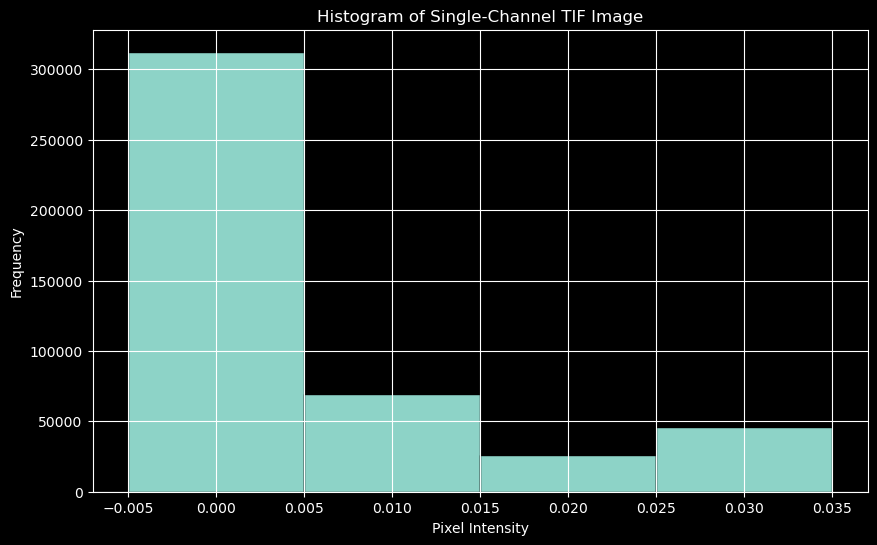

In [60]:
# 检查图像是否为单通道
if len(tif_image_inverse.shape) == 2:
    # 计算直方图
    bins = np.arange(0, np.max(tif_image_inverse) + 0.01, 0.01)
    hist, bin_edges = np.histogram(tif_image_inverse, bins=bins)

    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=0.01, edgecolor='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Single-Channel TIF Image')
    plt.grid(True)
    plt.show()
else:
    print("The image is not single-channel.")

In [61]:
#calculate the number of pixel in the image that < 1.0
num = 0
for i in range(tif_image2.shape[0]):
    for j in range(tif_image2.shape[1]):
        if tif_image2[i][j] < 1.0:
            num += 1
print(num)
num / tif_image2.shape[0] * tif_image2.shape[1]
print(np.min(tif_image2))

41151
0.0


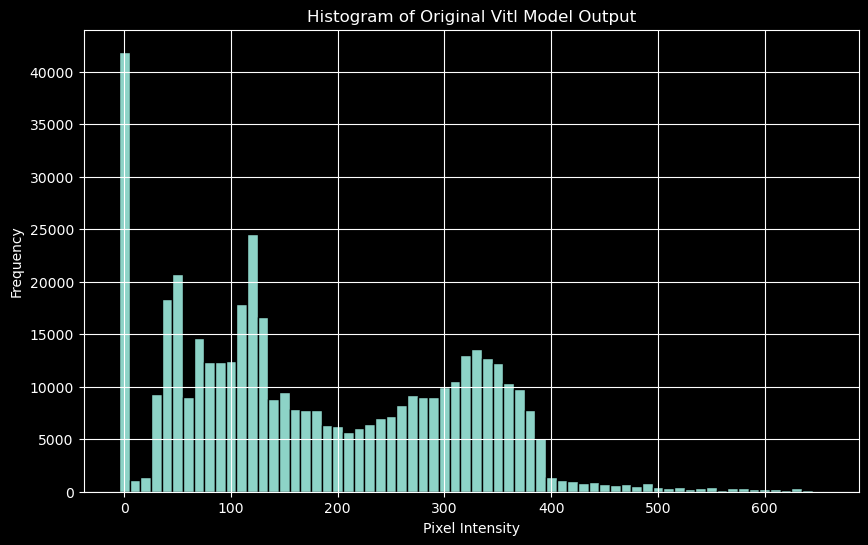

In [81]:

# 检查图像是否为单通道
if len(tif_image2.shape) == 2:
    # 计算直方图
    bins = np.arange(0, np.max(tif_image2) + 10, 10)
    hist, bin_edges = np.histogram(tif_image2, bins=bins)

    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=10, edgecolor='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Original Vitl Model Output')
    plt.grid(True)
    plt.show()
else:
    print("The image is not single-channel.")

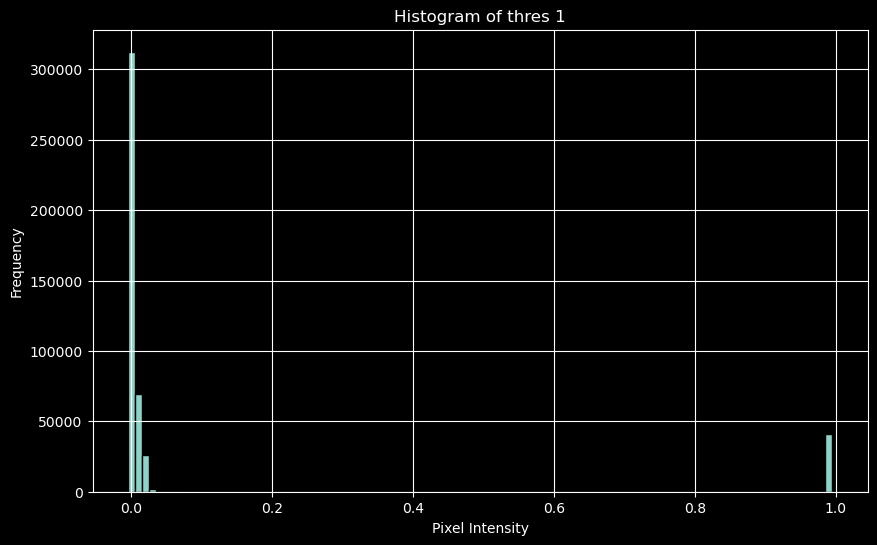

In [76]:

# 检查图像是否为单通道
if len(tif_image_inverse.shape) == 2:
    # 计算直方图
    bins = np.arange(0, np.max(tif_image_inverse) + 0.01, 0.01)
    hist, bin_edges = np.histogram(tif_image_inverse, bins=bins)

    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=0.01, edgecolor='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of thres 1')
    plt.grid(True)
    plt.show()
else:
    print("The image is not single-channel.")